In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sympy import Point, Line 
import seaborn as sns
import random
import math
from math import atan
from numpy import linalg as LA

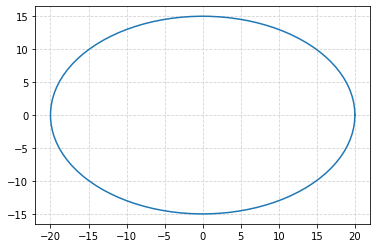

In [45]:
# Mother Shape
u=0   #x-position of the center
v=0    #y-position of the center
a=20    #radius on the x-axis
b=15    #radius on the y-axis

t = np.linspace(0, 2*math.pi, 100)
x=u+a*np.cos(t)
y=v+b*np.sin(t)
plt.plot( x,y )
plt.grid(color='lightgray',linestyle='--')
plt.show()

30

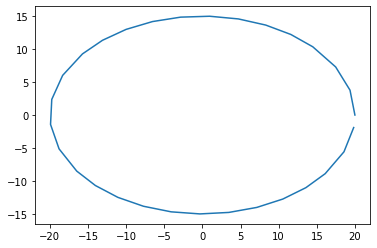

In [46]:
# Finding critical points

crit_x=[]
crit_y=[]
init=0
crit_x.append(x[0])
crit_y.append(y[0])
for i in range(100):

 M1=(y[init]-0)/x[init]
 M2=(y[i]-0)/x[i]
 
 angle = math.degrees(atan(abs((M2 - M1) / (1 + M1 * M2))))
 if angle > 9.7:
    crit_x.append(x[i])
    crit_y.append(y[i])
    init=i
plt.plot(crit_x,crit_y)
len(crit_y)

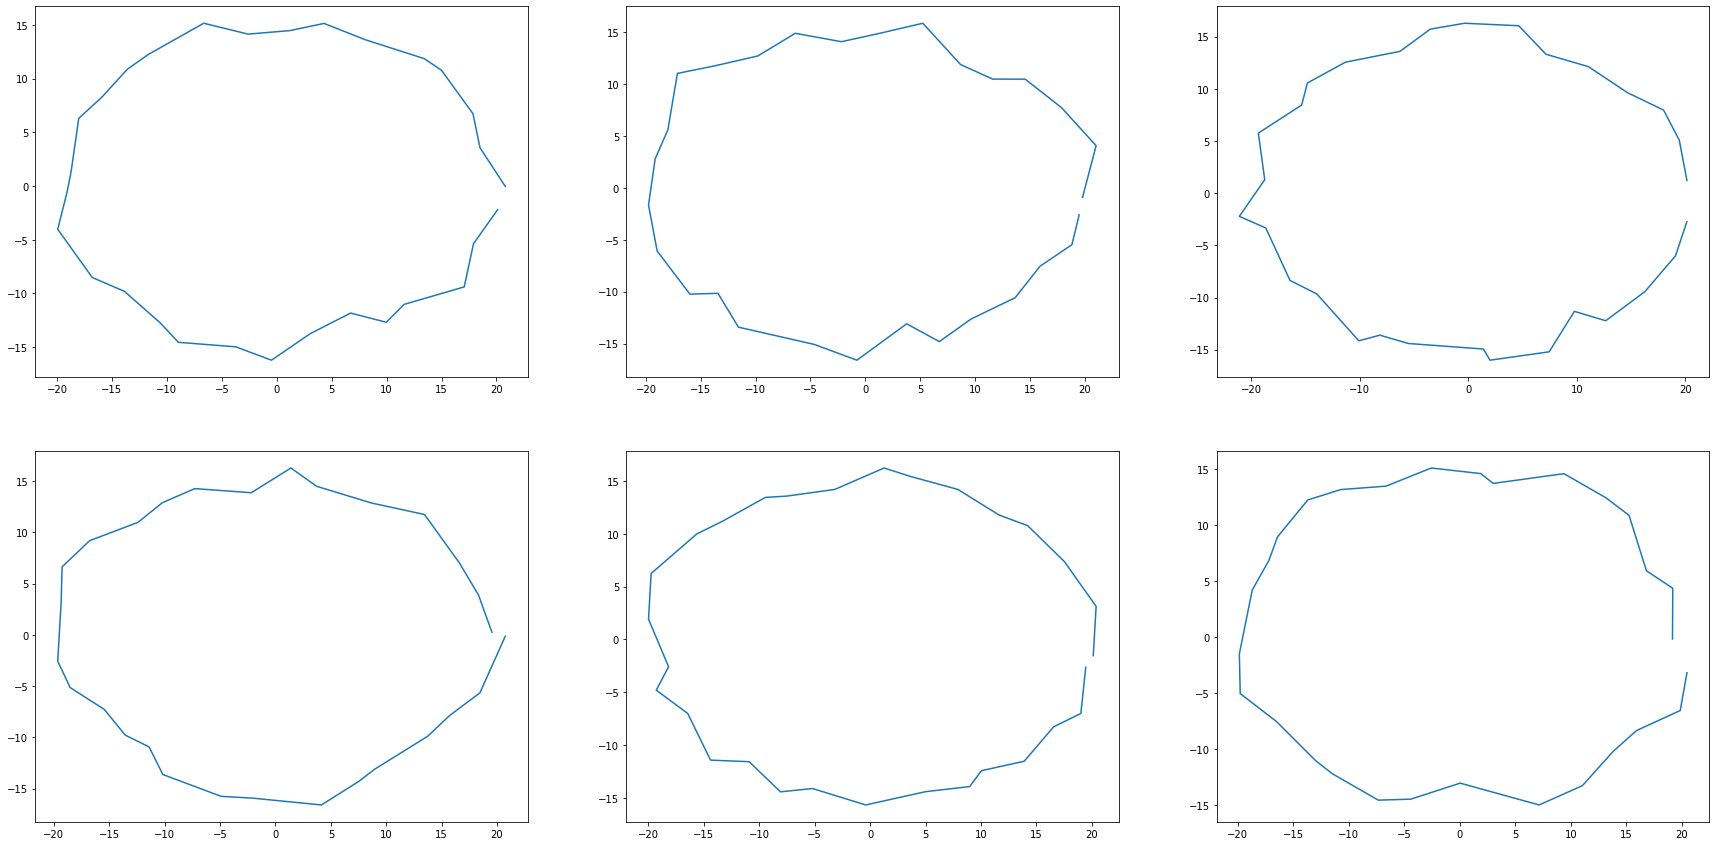

In [17]:
# Twenty shapes generated by adding random noise
random.seed(5)
c=[]
for i in range(20):
    x_jitter=crit_x+np.random.normal(0, .8, size=30)
    y_jitter=crit_y+np.random.normal(0, .8, size=30)
    c.append(x_jitter)
    c.append(y_jitter)
# All the coordinates are stored in a same array

split=np.array_split(c,40) #Array is split into 20
plt.figure(figsize=(30,15)) 
plt.subplot(2,3,1)
plt.plot(split[0][0],split[1][0])
plt.subplot(2,3,2)
plt.plot(split[2][0],split[3][0])
plt.subplot(2,3,3)
plt.plot(split[4][0],split[5][0])
plt.subplot(2,3,4)
plt.plot(split[6][0],split[7][0])
plt.subplot(2,3,5)
plt.plot(split[8][0],split[9][0])
plt.subplot(2,3,6)
plt.plot(split[10][0],split[11][0])

In [56]:
# Finding the average of all x and y points
x_bar=np.empty(30)
for i in range(30):
    for j in range(20):
        x_bar[i]=x_bar[i]+split[j*2][0][i]
x_avg=x_bar/20
y_bar=np.empty(30)
for i in range(30):
    for j in range(20):
        y_bar[i]=y_bar[i]+split[j*2+1][0][i]
y_avg=y_bar/20    
y_avg

array([  0.77812021,   4.73208616,   8.32541134,  11.019243  ,
        12.96169858,  13.97791145,  14.68328152,  14.94468941,
        14.99055024,  13.77025902,  12.66760224,  10.12163507,
         8.29969787,   5.29073366,   1.41117214,  -2.51262363,
        -6.23227424,  -9.42124861, -11.00164087, -12.87460106,
       -14.21733011, -14.95898445, -15.09324386, -14.77594093,
       -13.66235769, -12.00809866, -10.4446828 ,  -7.98156353,
        -4.68795606,  -1.01623788])

In [57]:
# Covariance matrix
cov_mat = np.stack((x_avg, y_avg), axis = 1)
covariance=np.cov(cov_mat)
covariance.shape

(30, 30)

In [58]:
# Eigen vectors and eigen values for covariance matrix
eigen_values, eigen_vectors = LA.eigh(covariance)
eigen_values

array([-6.01135279e-13, -1.24392393e-13, -9.91124197e-14, -7.14097934e-14,
       -7.05573733e-14, -6.40684890e-14, -3.60705071e-14, -2.19817093e-14,
       -1.91087377e-14, -9.56417584e-15, -7.40142154e-15, -5.76745582e-15,
       -3.14874447e-15, -2.14311943e-15, -8.85537908e-16, -3.45396538e-16,
        9.56119678e-16,  3.64484564e-15,  9.87956635e-15,  1.84838352e-14,
        1.98406749e-14,  4.07197073e-14,  4.63281656e-14,  6.01061891e-14,
        7.45885695e-14,  1.03983789e-13,  1.39719593e-13,  4.95824324e-13,
        5.41580036e-13,  4.31278966e+03])

In [63]:
# Choose a value n for PCA
resized_eig_vect=np.reshape(eigen_vectors[:10],newshape=(30,10)) # n is taken as 10 (out of 30)

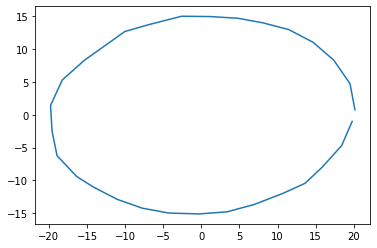

In [64]:
# Calculated shape
x_calc = x_avg + np.matmul(resized_eig_vect,eigen_values[:10])
y_calc = y_avg + np.matmul(resized_eig_vect,eigen_values[:10])
plt.plot(x_calc,y_calc)